# Accident Detection System

# Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2 
import os
import glob

from skimage import transform
import skimage

from sklearn.model_selection import train_test_split 

from keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import load_img

from keras.layers import LSTM
from keras.models import Model 
from keras.layers import Input,Dense,TimeDistributed

from keras.layers import Dropout

# Making Frames

## Data Distribution

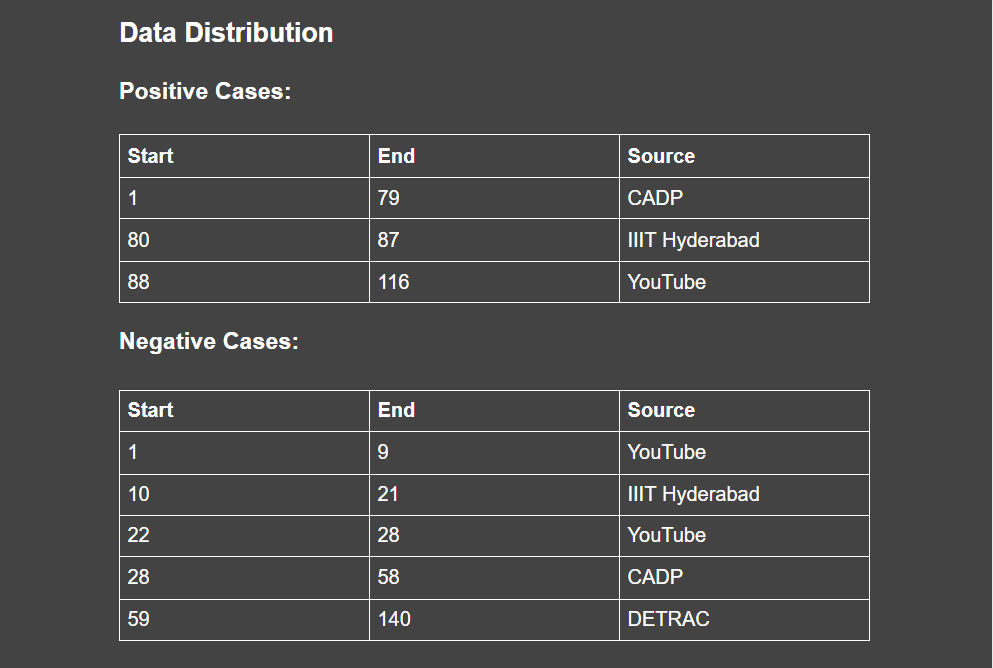

## Positive Cases

In [ ]:
os.chdir('/content/drive/MyDrive/Minor Project 3/CADP/Videos/Positive')

In [ ]:
def FrameCapture(path,folder): 
  cap = cv2.VideoCapture(path)
  property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
  length = int(cv2.VideoCapture.get(cap, property_id))
  count = 0
  success = 1
  
  if length > 100:
    cut = length-99
  else:
    cut = 0

  dir =  "/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/"+folder
  os.mkdir(dir)
 

  for i in range(length):
    success, image = cap.read()
    if count >= cut :
      n = count-cut    
      cv2.imwrite(dir+'/'+str(n)+'.jpg', image)
    count += 1


temp_dir = os.getcwd()

for video_file in os.listdir(temp_dir):
  path = temp_dir+"/"+video_file
  FrameCapture(path,video_file)

## Negative Cases

In [ ]:
os.chdir('/content/drive/MyDrive/Minor Project 3/CADP/Videos/Negative')

In [ ]:
def FrameCapture(path,folder): 
  cap = cv2.VideoCapture(path)
  property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
  length = int(cv2.VideoCapture.get(cap, property_id))
  count = 0
  success = 1
  
  if length > 100:
    cut = length-99
  else:
    cut = 0

  #dir = os.path.join(os.getcwd(),folder)
  dir =  "/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/"+folder
  os.mkdir(dir)
 
  #print(folder,cut,sep=' ')
  #while success:
  for i in range(length):
    success, image = cap.read()
    if count >= cut :
      n = count-cut
      #cv2.imwrite(dir+"/frame%d.jpg" % n, image) 
      cv2.imwrite(dir+'/'+str(n)+'.jpg', image)
    count += 1


temp_dir = os.getcwd()

for video_file in os.listdir(temp_dir):
  path = temp_dir+"/"+video_file
  FrameCapture(path,video_file)

# More Preprocessing

## Storing Positive and Negative Frames in diff variables

In [ ]:
os.chdir('/content/drive/MyDrive/Minor Project 3/CADP/Frames')

img_filepath = os.getcwd()                                      
neg = glob.glob(img_filepath + '/Negative/*.mp4')           
pos = glob.glob(img_filepath + '/Positive/*.mp4')             

all_files = np.concatenate((pos, neg))
print(len(neg), len(pos))                   

140 116


In [ ]:
len(all_files)

256

## Labelling Data

In [ ]:
#Labelling positive cases

pos_label = [[0, 1]]*len(pos)
len(pos_label)

116

In [ ]:
#Labelling negative cases

neg_label = [[1, 0]]*len(neg)
len(neg_label)

140

In [ ]:
# Storing both in a variable

labels = pos_label + neg_label
len(labels)

256

# Useless Functions

## Function to Resize and convert Frames to Grayscale

In [ ]:
def load_set(videofile):
    #vidcap = cv2.VideoCapture(videofile)
    error = ''    
    success = True
    flag = 0
    #while success:
        #success, img = vidcap.read()  

    frames = [] 
    for j in range(99):
        flag = 0
        try:
          img = cv2.imread(videofile + '/'+str(j) + '.jpg')
          #success, img = vidcap.read()
          flag += 1

          #print(np.array(img).shape)

          tmp = skimage.color.rgb2gray(np.array(img))
          flag += 1
          tmp = transform.resize(tmp, (144, 256))
          flag += 1
          
          frames.append(tmp)     
        except:
          print(flag, end = ' ')
          pass 

        #if np.shape(frames[0])!=(144,256):
            #error = 'Video is not the correct resolution.'
    #vidcap.release()
    return frames, error

In [ ]:
from PIL import Image

videofile = '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/55.mp4'

main_path = videofile

list_images_path = list(sorted(os.listdir(main_path)))

temp = []
list_images_path

for path in list_images_path:
  img1 = cv2.imread(os.path.join(main_path, path))
  img1.shape
  img1.resize(144,256)
  #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  temp.append(img1)


In [ ]:
def load_set(videofile):
    #vidcap = cv2.VideoCapture(videofile)
    error = ''    
    success = True
    flag = 0
    #while success:
        #success, img = vidcap.read()  

    frames = [] 
    for j in range(99):
        flag = 0
        try:
          img = cv2.imread(videofile + '/'+str(j) + '.jpg')
          #success, img = vidcap.read()
          flag += 1

          #print(np.array(img).shape)

          tmp = skimage.color.rgb2gray(np.array(img))
          flag += 1
          tmp = transform.resize(tmp, (144, 256))
          flag += 1
          
          frames.append(tmp)     
        except:
          print(flag, end = ' ')
          pass 

        #if np.shape(frames[0])!=(144,256):
            #error = 'Video is not the correct resolution.'
    #vidcap.release()
    return frames, error

## Function to load horizontally flipped frames 

In [ ]:
def hori_flipped_load_set(videofile):
  
  vidcap = cv2.VideoCapture(videofile)
  error = ''
  success = True
  
  while success:
    success, img = vidcap.read() 
    frames = []  
    for j in range(99):
        try:
          success, img = vidcap.read()

          tmp = skimage.color.rgb2gray(np.array(img))
          tmp = skimage.transform.resize(tmp, (144, 256))
          tmp = np.array(tmp)
          tmp = np.flip(tmp, axis = 1)

          frames.append(tmp)

        except:
          pass
    if np.shape(frames[0])!=(144,256):
      error = 'Video is not the correct resolution.'
  vidcap.release()
  return frames, error	

## Make dataset function

In [ ]:
def make_dataset(rand):
  seq1 = np.zeros( (2*len(rand), 99, 144, 256)) 
  for i,fi in enumerate(rand):                   
    print((i, fi))                           
    if fi[-4:] == '.mp4' and i%2==0:		
      t = load_set(fi)             

    elif fi[-4:] == '.mp4' and i%2==1:
      t = hori_flipped_load_set(fi)    
       
    #if t.shape==(99,144,256):
    if(len(t) == 99 and len(t[0]) == 144 and len(t[0][0]) == 256):                 
      seq1[i] = t                            
    else:# TypeError:
      print("Error")
      pass                              
  print((seq1.shape))
  return seq1

In [ ]:
os.getcwd()

'/content/drive/My Drive/Minor Project 3/CADP/Frames'

# Actual Functions

In [ ]:
def load_set(img_path):
  img = load_img(img_path)
  tmp = skimage.color.rgb2gray(np.array(img))
  tmp = transform.resize(tmp, (144, 256))
  return tmp

def horizontal_flip(img_path):
  img = load_img(img_path)
  tmp = skimage.color.rgb2gray(np.array(img))
  tmp = skimage.transform.resize(tmp, (144, 256))
  tmp = np.array(tmp)
  tmp = np.flip(tmp, axis = 1)
  return tmp


In [ ]:
def call_load_data(path):
  count = 0
  x = []

  for files in os.listdir(path):
    frames = []

    img_path = str(path) + "/"+str(files.decode("utf-8"))

    if count < 99:
      count = count + 1
      img = load_set(img_path)
    x.append(img)

  return x

def call_horizontal_flip(path):
  count = 0
  x = []
  for files in os.listdir(path):
    frames = []
    img_path = str(path) + "/"+str(files.decode("utf-8"))
    if count < 99:
      count = count + 1
      img = horizontal_flip(img_path)
    x.append(img)

  return x

In [ ]:
def make_dataset(rand):
  seq1 = np.zeros( (len(rand), 99, 144, 256)) 
  #seq1 = np.zeros( (2*len(rand), 99, 144, 256)) 
 
  #print(type(rand))
  for i, fi in enumerate(rand):                   
    print((i, fi))                           
    if fi[-4:] == '.mp4' and i%2==0:		
      t = call_load_data(fi)             

    elif fi[-4:] == '.mp4' and i%2==1:
      t = call_horizontal_flip(fi)   
       
    if(len(t) == 99 and len(t[0]) == 144 and len(t[0][0]) == 256):                 
      seq1[i] = t   
                       
    else:
      print("Error")
      print('Dimensions are - ', len(t), len(t[0]), len(t[0][0]), sep = " ")
      pass  
                      
  print((seq1.shape))
  return seq1

# Even More Preprocessing

## Test Train Split

In [ ]:
##### split data into training and validation (sets and shuffle)
x_train, x_test, y_train, y_test = train_test_split(all_files, labels, test_size=0.40, random_state=0)  
x_train = np.asarray(x_train); y_train = np.asarray(y_train);                         

''

In [ ]:
print(len(x_train))
print(len(y_train))

153
153


In [ ]:
print(len(x_test))
print(len(y_test))

103
103


In [ ]:
#Req libraries
import numpy as np

import os

from keras.callbacks import ModelCheckpoint


from keras.layers import LSTM
from keras.models import Model 
from keras.layers import Input,Dense,TimeDistributed

from keras.layers import Dropout


In [ ]:
frame , row, col =(99,144,256)
row_hidden = 128
col_hidden = 128
batch_size = 64       #256, 224, 128            #32 
num_classes = 2
epochs = 20

In [ ]:
x =Input(shape=(frame, row, col))
encoded_rows = TimeDistributed(LSTM(row_hidden))(x) 
encoded_columns =LSTM(col_hidden)(encoded_rows)

In [ ]:
layer2 = Dense(128, activation='relu')(encoded_columns)
layer3 = Dropout(.2)(layer2)
layer4 = Dense(64, activation='relu')(layer3)
layer5 = Dropout(.2)(layer4)
prediction = Dense(num_classes, activation='softmax')(layer5)

model = Model(x, prediction)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='NAdam', metrics=['accuracy']) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 99, 144, 256)]    0         
_________________________________________________________________
time_distributed (TimeDistri (None, 99, 128)           197120    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0     

## Creating testing and validation numpy arrays

In [ ]:
x_testA = make_dataset(x_testA[0:batch_size])

(0, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/2.mp4')
(1, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/56.mp4')
(2, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/77.mp4')
(3, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/60.mp4')
(4, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/89.mp4')
(5, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/110.mp4')
(6, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/19.mp4')
(7, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/108.mp4')
(8, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/16.mp4')
(9, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/48.mp4')
(10, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/75.mp4')
(11, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/8.mp4')
(12, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/94.mp4')
(13, '/content/drive/MyDrive/Minor 

In [ ]:
#Saving Numpy Array x_testA
os.chdir("/content/drive/MyDrive/Minor Project 3/")

np.save('x_testA.npy',x_testA)

In [ ]:
x_testB = make_dataset(x_testB[0:batch_size])

(0, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/55.mp4')
(1, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/114.mp4')
(2, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/12.mp4')
(3, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/84.mp4')
(4, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/50.mp4')
(5, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/79.mp4')
(6, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/117.mp4')
(7, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/100.mp4')
(8, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/64.mp4')
(9, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/33.mp4')
(10, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/46.mp4')
(11, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/101.mp4')
(12, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/91.mp4')
(13, '/content/drive/MyDrive/Mi

In [ ]:
#Saving Numpy Array x_testB
os.chdir("/content/drive/MyDrive/Minor Project 3/")
np.save('x_testB.npy', x_testB)

## Creating and saving x_test

In [ ]:
x_test_batch_list = [x_test[i:i + batch_size] for i in range(0, len(x_test), batch_size)]

In [ ]:
len(x_test_batch_list)

2

In [ ]:
x_test_batch = []
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
for i in range(len(x_test_batch_list)):
  x_test_batch = make_dataset(x_test[0:batch_size])
  np.save('x_test_batch['+str(i)+'].npy', x_test_batch)

(0, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/3.mp4')
(1, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/114.mp4')
(2, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/18.mp4')
(3, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/84.mp4')
(4, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/54.mp4')
(5, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/93.mp4')
(6, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/7.mp4')
(7, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/133.mp4')
(8, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/64.mp4')
(9, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/36.mp4')
(10, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/51.mp4')
(11, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/132.mp4')
(12, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/91.mp4')
(13, '/content/drive/MyDrive/Minor

## Loading x_testA and x_testB from .npy files

In [ ]:
os.chdir('/content/drive/MyDrive/Minor Project 3/')
x_testA = np.load('x_testA.npy')
x_testA.shape

(52, 99, 144, 256)

In [ ]:
x_testB = np.load('x_testB.npy')
x_testB.shape

(51, 99, 144, 256)

In [ ]:
#x_test
x_test = np.load('x_test.npy')
x_test.shape

# Model

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/")
i=0; filepath='HRNN_pretrained_model.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

np.random.seed(1642)

In [ ]:
for i in range(0, epochs): 
  c = list(zip(x_train, y_train)) 
  random.shuffle(c) 

x_shuff, y_shuff = zip(*c) 
x_shuff = np.array(x_shuff)
y_shuff=np.array(y_shuff) 

x_batch = [x_shuff[i:i + batch_size] for i in range(0, len(x_shuff), batch_size)] 
y_batch = [y_shuff[i:i + batch_size] for i in range(0, len(x_shuff), batch_size)] 

In [ ]:
print('x_batch length = ',len(x_batch))
print('y_batch length = ',len(y_batch))

print('x_batch[0] length = ',len(x_batch[0]))
print('y_batch[0] length = ',len(x_batch[0]))

print('x_testB type = ',type(x_testB))
print('y_testB type = ',type(y_testB))

print('y_testB length = ', len(y_testB))
print('x_testB shape = ', x_testB.shape)

Prepocessing different batches of x_train and y_train and then storing them in Drive

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
for i in range(len(x_batch)):
  xx = make_dataset(x_batch[i])
  np.save('xx['+str(i)+'].npy', xx)
  yy = y_batch[i]
  np.save('yy['+str(i)+'].npy', yy)

(0, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/50.mp4')
(1, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/12.mp4')
(2, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/88.mp4')
(3, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/30.mp4')
(4, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/7.mp4')
(5, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/85.mp4')
(6, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/108.mp4')
(7, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/140.mp4')
(8, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/78.mp4')
(9, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/128.mp4')
(10, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/48.mp4')
(11, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Positive/100.mp4')
(12, '/content/drive/MyDrive/Minor Project 3/CADP/Frames/Negative/47.mp4')
(13, '/content/drive/MyDrive/Min

Prepocessing different batches of y_test and storing them in Drive

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
y_test_temp = [y_test[i:i + batch_size] for i in range(0, len(y_test), batch_size)] 
y_testB_temp = np.array(y_test_temp)
np.save('y_test_temp.npy',y_test_temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## Saving xx and yy for Model 256

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/")
np.save('xx.npy',xx)
np.save('yy.npy', yy)

## Loading xx and yy for Model 256

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/")
xx = np.load('xx.npy')

In [ ]:
yy = np.load('yy.npy')

In [ ]:
xx.shape

(153, 99, 144, 256)

In [ ]:
yy.shape

(153, 2)

In [ ]:
y_test_temp1 = np.array(y_test[0:batch_size])
y_test_temp2 = np.array(y_test[38:102])
y_test_np = np.concatenate((y_test_temp1, y_test_temp2), axis = 0)

In [ ]:
np.save('y_test_np.npy',y_test_np)

In [ ]:
y_test = np.load('y_test_np.npy')
y_test.shape

(128, 2)

# Model 256

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/")

xx = np.load('xx.npy')
yy = np.load('yy.npy') 

In [ ]:
model.fit(xx, yy, batch_size=len(xx),epochs=10, callbacks=callbacks_list)

del xx
del yy

modelfilename = '/content/drive/MyDrive/Minor Project 3/Checkpoints/model_256.h5' 
model.save_weights(modelfilename)

## Making and storing model

In [ ]:
model.fit(xx, yy, batch_size=len(xx),epochs=10, validation_data=(x_testB, y_testB_temp), callbacks=callbacks_list)

Epoch 1/10


In [ ]:
#Save Model Weights
path = '/content/drive/MyDrive/Minor Project 3/Checkpoints/model_v2.h5'

model.save_weights(path)

# Model 64

## Success 1

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
for i in range(3):
  xx = np.load('xx['+str(i)+'].npy')
  yy = np.load('yy['+str(i)+'].npy')

  model.fit(xx, yy, batch_size=len(xx),epochs=30, callbacks=callbacks_list)
  #model.fit(xx, yy, batch_size=len(xx),epochs=30)

  del xx
  del yy

  modelfilename = '/content/drive/MyDrive/Minor Project 3/Checkpoints/model_64['+str(i)+'].h5' 
  model.save_weights(modelfilename)

Epoch 1/30
1/1 [==============================] - 1s 854ms/step - loss: 0.6766 - accuracy: 0.6562
Epoch 2/30
1/1 [==============================] - 1s 502ms/step - loss: 0.5804 - accuracy: 0.7188
Epoch 3/30
1/1 [==============================] - 1s 539ms/step - loss: 0.5659 - accuracy: 0.7344
Epoch 4/30
1/1 [==============================] - 0s 438ms/step - loss: 0.7089 - accuracy: 0.4844
Epoch 5/30
1/1 [==============================] - 1s 592ms/step - loss: 0.6831 - accuracy: 0.5156
Epoch 6/30
1/1 [==============================] - 0s 487ms/step - loss: 0.6270 - accuracy: 0.6562
Epoch 7/30
1/1 [==============================] - 0s 485ms/step - loss: 0.6211 - accuracy: 0.6094
Epoch 8/30
1/1 [==============================] - 0s 481ms/step - loss: 0.6757 - accuracy: 0.4844
Epoch 9/30
1/1 [==============================] - 1s 536ms/step - loss: 0.6373 - accuracy: 0.6250
Epoch 10/30
1/1 [==============================] - 0s 500ms/step - loss: 0.6190 - accuracy: 0.6094
Epoch 11/30
1/1 [==

## Success 2

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
for i in range(3):
  xx = np.load('xx['+str(i)+'].npy')
  yy = np.load('yy['+str(i)+'].npy')

  model.fit(xx, yy, batch_size=len(xx),epochs=20, callbacks=callbacks_list)
  #model.fit(xx, yy, batch_size=len(xx),epochs=30)

  del xx
  del yy

  modelfilename = '/content/drive/MyDrive/Minor Project 3/Checkpoints/model_64['+str(i)+'].h5' 
  model.save_weights(modelfilename)

Epoch 1/20
1/1 [==============================] - 1s 884ms/step - loss: 0.7822 - accuracy: 0.5625
Epoch 2/20
1/1 [==============================] - 0s 428ms/step - loss: 0.7313 - accuracy: 0.4375
Epoch 3/20
1/1 [==============================] - 0s 434ms/step - loss: 0.6786 - accuracy: 0.6250
Epoch 4/20
1/1 [==============================] - 0s 419ms/step - loss: 0.6650 - accuracy: 0.6406
Epoch 5/20
1/1 [==============================] - 0s 487ms/step - loss: 0.6696 - accuracy: 0.6094
Epoch 6/20
1/1 [==============================] - 1s 505ms/step - loss: 0.6621 - accuracy: 0.6562
Epoch 7/20
1/1 [==============================] - 0s 482ms/step - loss: 0.6574 - accuracy: 0.6094
Epoch 8/20
1/1 [==============================] - 0s 464ms/step - loss: 0.6293 - accuracy: 0.5781
Epoch 9/20
1/1 [==============================] - 0s 498ms/step - loss: 0.6271 - accuracy: 0.6875
Epoch 10/20
1/1 [==============================] - 1s 511ms/step - loss: 0.6753 - accuracy: 0.6094
Epoch 11/20
1/1 [==

## Success 3

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
for i in range(3):
  xx = np.load('xx['+str(i)+'].npy')
  yy = np.load('yy['+str(i)+'].npy')

  #model.fit(xx, yy, batch_size=len(xx),epochs=30, callbacks=callbacks_list)
  model.fit(xx, yy, batch_size=len(xx),epochs=30)

  del xx
  del yy

  modelfilename = '/content/drive/MyDrive/Minor Project 3/Checkpoints/model_64['+str(i)+'].h5' 
  model.save_weights(modelfilename)

Epoch 1/30
1/1 [==============================] - 19s 19s/step - loss: 0.7141 - accuracy: 0.4375
Epoch 2/30
1/1 [==============================] - 1s 550ms/step - loss: 0.6931 - accuracy: 0.5625
Epoch 3/30
1/1 [==============================] - 0s 499ms/step - loss: 0.7005 - accuracy: 0.5156
Epoch 4/30
1/1 [==============================] - 1s 533ms/step - loss: 0.6697 - accuracy: 0.5469
Epoch 5/30
1/1 [==============================] - 1s 509ms/step - loss: 0.6485 - accuracy: 0.6094
Epoch 6/30
1/1 [==============================] - 1s 520ms/step - loss: 0.6755 - accuracy: 0.6094
Epoch 7/30
1/1 [==============================] - 1s 501ms/step - loss: 0.6799 - accuracy: 0.5781
Epoch 8/30
1/1 [==============================] - 0s 496ms/step - loss: 0.7534 - accuracy: 0.4375
Epoch 9/30
1/1 [==============================] - 1s 509ms/step - loss: 0.6922 - accuracy: 0.5312
Epoch 10/30
1/1 [==============================] - 0s 465ms/step - loss: 0.6795 - accuracy: 0.6406
Epoch 11/30
1/1 [===

# Best Model Load

In [ ]:
#Req libraries
import numpy as np
import pandas as pd

import cv2 
import os

from skimage import transform
import skimage

from keras.callbacks import ModelCheckpoint

from keras.layers import LSTM
from keras.models import Model 
from keras.layers import Input,Dense,TimeDistributed

from keras.layers import Dropout

In [ ]:
frame , row, col =(99,144,256)
row_hidden = 128
col_hidden = 128
batch_size = 64    
num_classes = 2
epochs = 20

In [ ]:
path = "/content/drive/MyDrive/Minor Project 3/Checkpoints/Success 2/model_64[1].h5"

In [ ]:
x =Input(shape=(frame, row, col))
encoded_rows = TimeDistributed(LSTM(row_hidden))(x) 
encoded_columns =LSTM(col_hidden)(encoded_rows)

layer2 = Dense(128, activation='relu')(encoded_columns)
layer3 = Dropout(.2)(layer2)
layer4 = Dense(64, activation='relu')(layer3)
layer5 = Dropout(.2)(layer4)
prediction = Dense(num_classes, activation='softmax')(layer5)

model = Model(x, prediction)
model.load_weights(path)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='NAdam', metrics=['accuracy']) 
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 99, 144, 256)]    0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 99, 128)           197120    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0   

In [ ]:
os.chdir("/content/drive/MyDrive/Minor Project 3/Model 64/")
x_test_zero = np.load('x_test_batch[0].npy')
x_test_one = np.load('x_test_batch[1].npy')

In [ ]:
x_test = np.concatenate((x_test_zero, x_test_one), axis = 0)
y_test = np.load('y_test_np.npy')

In [ ]:
print('x_test_zero size = ', x_test_zero.shape)
print('x_test_one size = ', x_test_one.shape)
print('x_test size = ', x_test.shape)
print('y_test size = ', y_test.shape)

x_test_zero size =  (64, 99, 144, 256)
x_test_one size =  (64, 99, 144, 256)
x_test size =  (128, 99, 144, 256)
y_test size =  (128, 2)


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 0.127873
Test accuracy: 0.920457


# Alert System

In [ ]:
def send_alertt(flag, camera_number):
  
  print('Prediction Probabilities are\nNegative = ', flag[0][0],'\nPositive = ',flag[0][1])

  if(flag[0][1] > 0.6):
    print('Accident Detected\n')
    send_alert(camera_number)
  else:
    print('No accident')

In [ ]:
import pandas as pd
import smtplib
import os


def send_alert(camera_number):
  your_email = 'minorproject888@gmail.com'
  your_password = 'dssvouztedbhbrjt'

  server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
  server.ehlo()
  server.login(your_email, your_password)


  email_list = pd.read_excel("/content/drive/MyDrive/Minor Project 3/Email/EmailL.xlsx")
  camera = pd.read_excel("/content/drive/MyDrive/Minor Project 3/Email/Cameras.xlsx")

  gps_location = camera.loc[camera_number]

  all_emails = email_list['Email']

  for idx in range(len(all_emails)):

      email = all_emails[idx]
      subject = 'Requesting Immediate Help'
      message = 'Urgent - An accident has occurred.\nLocation -> ' + str(gps_location['Location']) + '\nGoogle Maps Link -> ' + str(gps_location['GPS Link'] + 
                                                                                                                                    '\n\nNOTE : This is not an actual accident, only an emulation of an accident\n')
     
      full_email = ("From: <{0}>\n"
                    "To:  <{1}>\n"
                    "Subject: {2}\n\n"
                    "{3}"
                    .format(your_email, email, subject, message))

      try:
          server.sendmail(your_email, [email], full_email)
          print('Email to {} successfully sent!\n'.format(email))
      except Exception as e:
          print('Email to {} could not be sent :( because {}\n\n'.format(email, str(e)))

  server.close()

In [ ]:
path = "/content/drive/MyDrive/Minor Project 3/Run Cases/Positive/"
#path = "/content/drive/MyDrive/Minor Project 3/Run Cases/Negative/"

video_name = '03.mp4'

camera_number = 2


cap = cv2.VideoCapture(path+video_name)
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
length = int(cv2.VideoCapture.get(cap, property_id))
count = 0
success = 1


if length > 100:
  cut = length-99
else:
  cut = 0

video_ready = []

for i in range(length):
  success, image = cap.read()
  
  if count >= cut :
    n = count-cut
    tmp = skimage.color.rgb2gray(np.array(image))
    tmp = transform.resize(tmp, (144, 256))
    video_ready.append(tmp)
  count += 1



video_ready = [video_ready]
video_ready = np.array(video_ready)

video_ready.shape

flag = model.predict(video_ready)

send_alertt(flag, camera_number)

Prediction Probabilities are
Negative =  0.10617728 
Positive =  0.8938228
Accident Detected

Email to gurpreet.e9842@cumail.in successfully sent!

Email to 18bcs6124@cuchd.in successfully sent!

Email to 18bcs6129@cuchd.in successfully sent!

Email to 18bcs6131@cuchd.in successfully sent!

Email to 18bcs6138@cuchd.in successfully sent!

Email to 18bcs6145@cuchd.in successfully sent!

